In [53]:
try:
    import nqcpfem
except ModuleNotFoundError as err:
    import sys
        # put path to nqcpfem module here   
    src_path = '/mnt/c/Users/olisc/NQCP/NQCP_FEM/'
    sys.path.append(src_path)
    import nqcpfem
import sympy
sympy.init_printing(use_latex='mathjax')
import IPython.display as disp
from matplotlib import pyplot as plt
import numpy as np
import os

import logging
logging.getLogger().setLevel(logging.DEBUG)

E0 = 1/(nqcpfem.UNIT_CONVENTION['J to eV']*1e6) # unit_scale: 1muev
from nqcpfem.parameter_search import DBMPParameterSearch

search = DBMPParameterSearch([],None,'temp')
search.db_name = 'db_sweet_spot_low4.db'

base_dir = "/mnt/c/Users/olisc/NQCP/NQCP_FEM/notebooks/Experiments/dot_sc_dot/couplings/debug/short/"
filename = "debug_optim_outlier"
base_dir = "/mnt/c/Users/olisc/NQCP/NQCP_FEM/slurm/optimize/debug/"
filename = "optimize_290_zoom"
search.db_name = base_dir+'db_'+filename+'.db'

import pickle as pkl
with open (base_dir+f'param_'+filename+'.pkl','rb') as f:
    parameter_set = pkl.load(f)

In [54]:
import pandas as pd
from nqcpfem.envelope_function import sort_eigenvalues
dicts = []
with search.__db__() as db:
    for i,p in enumerate(parameter_set):
        p = p.copy()
        try:
            result = db[str(i)]
        except KeyError as err:
            continue
        
        #for i,v in enumerate(sort_eigenvalues(result[0])):
        #    p[str(i)] = v/E0
        for k,l in result.items():
            for i in range(len(l)):
                p[k+f'{i}'] = np.abs(l[i])
        dicts.append(p)
        break
        
df = pd.DataFrame(dicts)
df

AttributeError: 'tuple' object has no attribute 'items'

In [55]:
#TODO: sort according to eigenvalues, so that we get something pretty and write code that computes the eigenvectors at some specific setting, so that we can see whether we can find nice representative eigenstates at all in this weird scenario
result 

(array([-2.73516580e-24,  2.73516580e-24, -6.98832275e-24,  6.98832275e-24,
         7.78562982e-24, -7.78562982e-24, -9.65990278e-24,  9.65990278e-24,
         1.11045336e-23, -1.11045336e-23, -1.59871942e-23,  1.59871942e-23,
        -2.70206880e-23,  2.70206880e-23, -2.93257914e-23,  2.93257914e-23,
        -3.26320939e-23,  3.26320939e-23, -3.36483609e-23,  3.36483609e-23]),
 {'plu': [(0.3423432170501058+0.018336638076831814j),
   (0.18844370112884537-0.0020886004481751267j),
   (-0.0026212237376989074+1.762240521059496e-05j),
   (0.03651456942543162+0.00023975710608119537j),
   (-0.7754689239102476-0.004397346100172344j),
   (-0.08846597566267721-0.0003224969385478729j),
   (-0.038657416996287094-0.00023983772858260274j),
   (-0.3231587822437448+0.006688870271587202j),
   (0.17063627043904644+0.0021763165155778705j),
   (-0.08054604150105786-0.0004338543922978687j),
   (0.003286664420125136+0.00016117122002095303j),
   (0.18215356641286998+0.000886821670830634j),
   (-0.0224282422

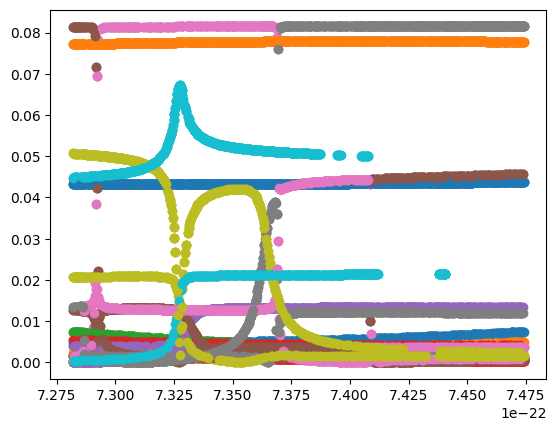

In [48]:
fig,ax = plt.subplots()
for n,g in df.groupby('mu_sc_val'):
    ax.scatter(g['mu_R_val'],g['prd0'])
    ax.scatter(g['mu_R_val'],g['prd2'])
    ax.scatter(g['mu_R_val'],g['prd4'])
    ax.scatter(g['mu_R_val'],g['prd6'])
    ax.scatter(g['mu_R_val'],g['prd8'])
    ax.scatter(g['mu_R_val'],g['prd10'])
    ax.scatter(g['mu_R_val'],g['prd12'])
    ax.scatter(g['mu_R_val'],g['prd14'])
    ax.scatter(g['mu_R_val'],g['prd16'])
    ax.scatter(g['mu_R_val'],g['prd18'])
    #ax.scatter(g['mu_R_val'],g['plu1'])
    #ax.scatter(g['mu_R_val'],g['plu2'])
    #ax.scatter(g['mu_R_val'],g['plu3'])
    #ax.scatter(g['mu_R_val'],g['plu4'])

#ax.set_yscale('log')

(-130.0, 130.0)

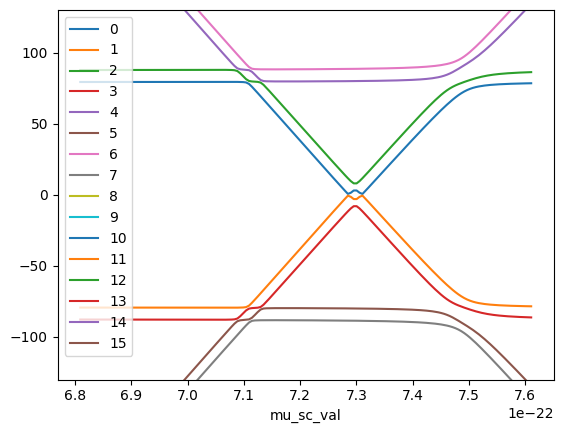

In [19]:
ax =df.plot('mu_sc_val',list(str(i) for i in range(16)))
ax.set_ylim(-130,130)